In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# dfs = [pd.read_csv('warm_start_comparison_0_7.csv'),
#        pd.read_csv('warm_start_comparison.csv')]
# df = pd.concat(dfs)
# df.to_csv('warm_start_comparison_06_21_22.csv', index=False)

In [3]:
run_str = '06_21_22_gmic_cold_tight_tol_warm'

In [24]:
# df = pd.read_csv(f'warm_start_comparison_{run_str}.csv')
df = pd.read_csv(f'warm_start_comparison.csv')

In [25]:
df['warm failed cglp ratio'] = df['failed cglps']/df['warm evaluated nodes']
df['warm null cglp ratio'] = df['null cglps']/df['warm evaluated nodes']
df['warm run cglp ratio'] = df['run cglps']/df['warm evaluated nodes']

In [26]:
if 'stopped on time' not in df.columns:
    df['stopped on time'] = False
    
if 'cut generation time' not in df.columns:
    df['cut generation time'] = 0

In [27]:
df['restart solve time without cglp'] = df['total restart solve time'] - \
    df['cut generation time'] - df['cglp init time']
df['restart solve time without cglp ratio'] = \
    (df['cold solve time'] - df['restart solve time without cglp']) / df['cold solve time']
df['stopped on time'] = df['stopped on time'].fillna(value=False)

In [28]:
df

,test number,cut off,cglp_constraints,cglp_bounds,gomory_cuts,initial gap improvement ratio,cut off gap improvement ratio,warm evaluated nodes ratio,total restart evaluated nodes ratio,warm solve time ratio,total restart solve time ratio,cold objective value,cold initial dual bound,cold initial gap,cold cut off dual bound,cold cut off gap,warm objective value,warm initial dual bound,warm initial gap,warm cut off dual bound,warm cut off gap,cold evaluated nodes,warm evaluated nodes,total restart evaluated nodes,cold solve time,cut off time,cglp init time,warm solve time,total restart solve time,cut generation time,failed cglps,null cglps,run cglps,solution gaps overlap,stopped on time,warm failed cglp ratio,warm null cglp ratio,warm run cglp ratio,restart solve time without cglp,restart solve time without cglp ratio
0,0,16,cumulative,cumulative,False,0.381493,0.443552,0.421687,0.325301,-61.059413,-62.003231,-1148.0,-1188.365844,0.035162,-1178.329317,0.026419,-1148.000888,-1172.967479,0.021748,-1164.8776,0.014701,166,96,112,0.428914,0.065321,22.041217,26.618151,27.022968,4.491699,0,0,308,True,False,0.0,0.0,3.208333,0.490052,-0.142541


In [15]:
# shouldn't need to run - refactor to just filter for df["solution gaps overlap"] == True
# df = df[df['stopped on time'] == False]
df = df[df['solution gaps overlap']]

In [23]:
df.loc[df['test number'] == 0]

,test number,cut off,cglp_constraints,cglp_bounds,gomory_cuts,initial gap improvement ratio,cut off gap improvement ratio,warm evaluated nodes ratio,total restart evaluated nodes ratio,warm solve time ratio,total restart solve time ratio,cold objective value,cold initial dual bound,cold initial gap,cold cut off dual bound,cold cut off gap,warm objective value,warm initial dual bound,warm initial gap,warm cut off dual bound,warm cut off gap,cold evaluated nodes,warm evaluated nodes,total restart evaluated nodes,cold solve time,cut off time,cglp init time,warm solve time,total restart solve time,cut generation time,failed cglps,null cglps,run cglps,solution gaps overlap,stopped on time,warm failed cglp ratio,warm null cglp ratio,warm run cglp ratio,restart solve time without cglp,restart solve time without cglp ratio
0,0,4,cumulative,cumulative,False,0.025089,0.135205,0.096386,0.072289,-11.795111,-12.144579,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,150,154,0.279356,0.018876,2.557646,3.574391,3.672017,0.769313,0,0,210,True,False,0.0,0.0,1.400000,0.345059,-0.235193
1,0,4,cumulative,fixed,False,0.025089,0.135205,0.024096,0.000000,-34.298082,-34.647551,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,162,166,0.279356,0.018876,8.624144,9.860731,9.958357,0.971305,0,0,128,True,False,0.0,0.0,0.790123,0.362909,-0.299090
2,0,4,fixed,cumulative,False,0.025089,0.135205,0.084337,0.060241,-11.038582,-11.388050,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,152,156,0.279356,0.018876,2.427101,3.363050,3.460676,0.673410,0,0,186,True,False,0.0,0.0,1.223684,0.360165,-0.289271
3,0,4,fixed,fixed,False,0.025089,0.135205,-0.120482,-0.144578,-3.853180,-4.202649,-1148.0,-1188.365844,0.035162,-1188.289807,0.035096,-1148.000000,-1187.353091,0.034280,-1182.842439,0.030351,166,186,190,0.279356,0.018876,0.078750,1.355765,1.453391,1.008300,0,0,175,True,False,0.0,0.0,0.940860,0.366341,-0.311377
4,0,8,cumulative,cumulative,False,0.197958,0.231567,0.325301,0.277108,-47.007224,-47.668111,-1148.0,-1188.365844,0.035162,-1182.720000,0.030244,-1148.006084,-1180.381366,0.028201,-1174.686207,0.023240,166,112,120,0.263963,0.022253,10.211666,12.672131,12.846581,2.339467,0,0,323,True,False,0.0,0.0,2.883929,0.295448,-0.119277
5,0,8,cumulative,fixed,False,0.204734,0.175677,0.108434,0.060241,-81.752738,-82.413625,-1148.0,-1188.365844,0.035162,-1182.720000,0.030244,-1148.000000,-1180.101579,0.027963,-1176.620486,0.024931,166,148,156,0.263963,0.022253,19.636380,21.843661,22.018111,2.024781,0,0,254,True,False,0.0,0.0,1.716216,0.356949,-0.352271
6,0,8,fixed,cumulative,False,0.204734,0.174907,0.240964,0.192771,-20.895349,-21.556236,-1148.0,-1188.365844,0.035162,-1182.720000,0.030244,-1148.000000,-1180.101579,0.027963,-1176.647239,0.024954,166,126,134,0.263963,0.022253,4.329001,5.779562,5.954012,1.313647,0,0,269,True,False,0.0,0.0,2.134921,0.311363,-0.179572
7,0,8,fixed,fixed,False,0.204734,0.174897,0.096386,0.048193,-7.349284,-8.010171,-1148.0,-1188.365844,0.035162,-1182.720000,0.030244,-1148.000000,-1180.101579,0.027963,-1176.647589,0.024954,166,150,158,0.263963,0.022253,0.152197,2.203902,2.378352,1.871095,0,0,238,True,False,0.0,0.0,1.586667,0.355060,-0.345113
8,0,16,cumulative,cumulative,False,0.381493,0.443552,0.421687,0.325301,-59.201267,-60.570235,-1148.0,-1188.365844,0.035162,-1178.329317,0.026419,-1148.000888,-1172.967479,0.021748,-1164.877600,0.014701,166,96,112,0.273766,0.046409,13.663712,16.481060,16.855837,2.876214,0,0,308,True,False,0.0,0.0,3.208333,0.315911,-0.153947
9,0,16,cumulative,fixed,False,0.339016,0.303975,0.180723,0.084337,-165.919285,-167.288253,-1148.0,-1188.365844,0.035162,-1178.329317,0.026419,-1148.000000,-1174.681181,0.023241,-1169.109957,0.018388,166,136,152,0.273766,0.046409,41.978576,45.696825,46.071602,3.718054,0,0,279,True,False,0.0,0.0,2.051471,0.37

In [21]:
cut_offs = list(df['cut off'].unique())
tests = len(df['test number'].unique())
cglp_parameters = [{'cglp_constraints': 'cumulative', 'cglp_bounds': 'cumulative'},
                   {'cglp_constraints': 'cumulative', 'cglp_bounds': 'fixed'},
                   {'cglp_constraints': 'fixed', 'cglp_bounds': 'cumulative'},
                   {'cglp_constraints': 'fixed', 'cglp_bounds': 'fixed'}]

title = {
    'initial gap improvement ratio': 'Warm Start Initial Gap Relative Improvement',
    'cut off gap improvement ratio': 'Warm Start Cut Off Gap Relative Improvement',
    'warm evaluated nodes ratio': 'Warm Start Evaluated Nodes Relative Improvement',
    'total restart evaluated nodes ratio': 'Total Restart Evaluated Nodes Relative Improvement',
    'warm solve time ratio': 'Warm Start Run Time Relative Improvement',
    'total restart solve time ratio': 'Total Restart Run Time Relative Improvement',
    'restart solve time without cglp ratio': 'Total Restart Run Time Relative Improvement without CGLP',
    'warm null cglp ratio': 'Ratio of Warm Start Nodes Not Selecting Own CGLP Cut'
}

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_99787/2646293355.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


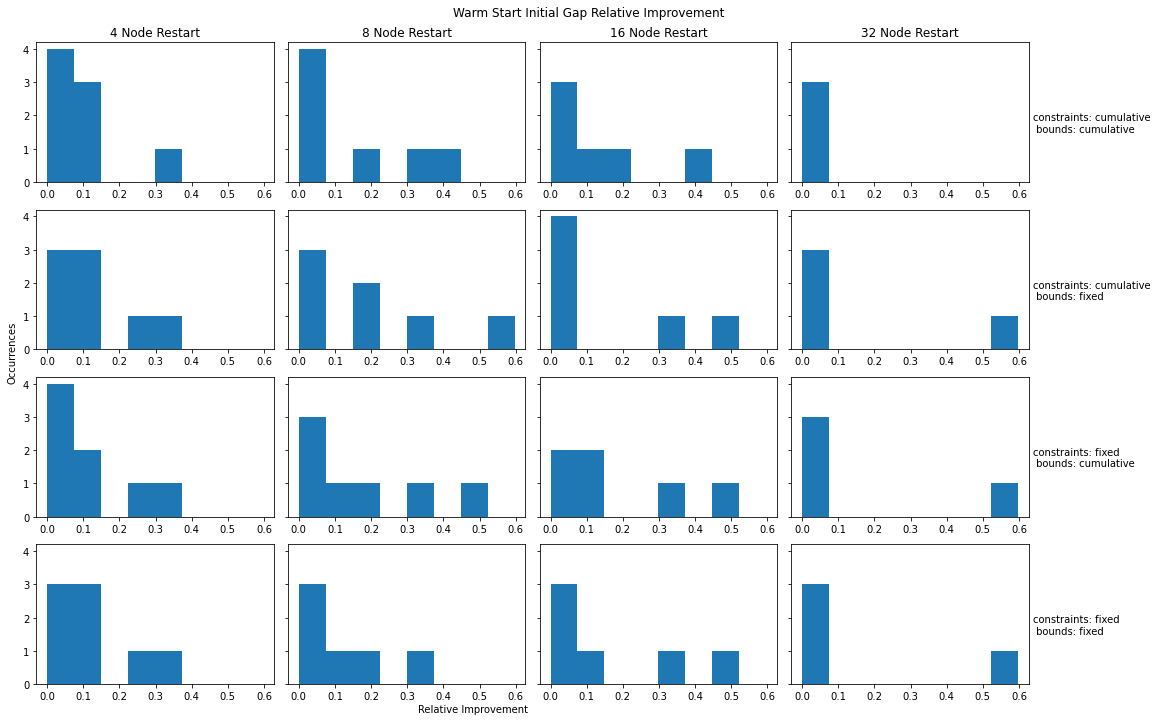

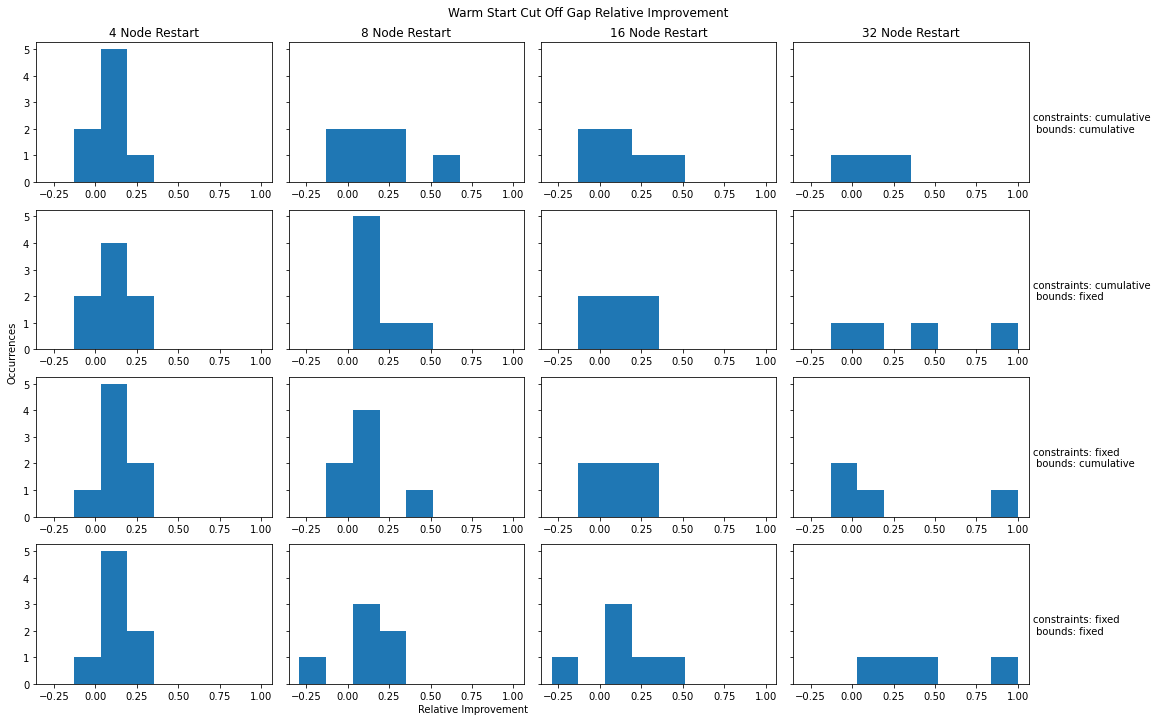

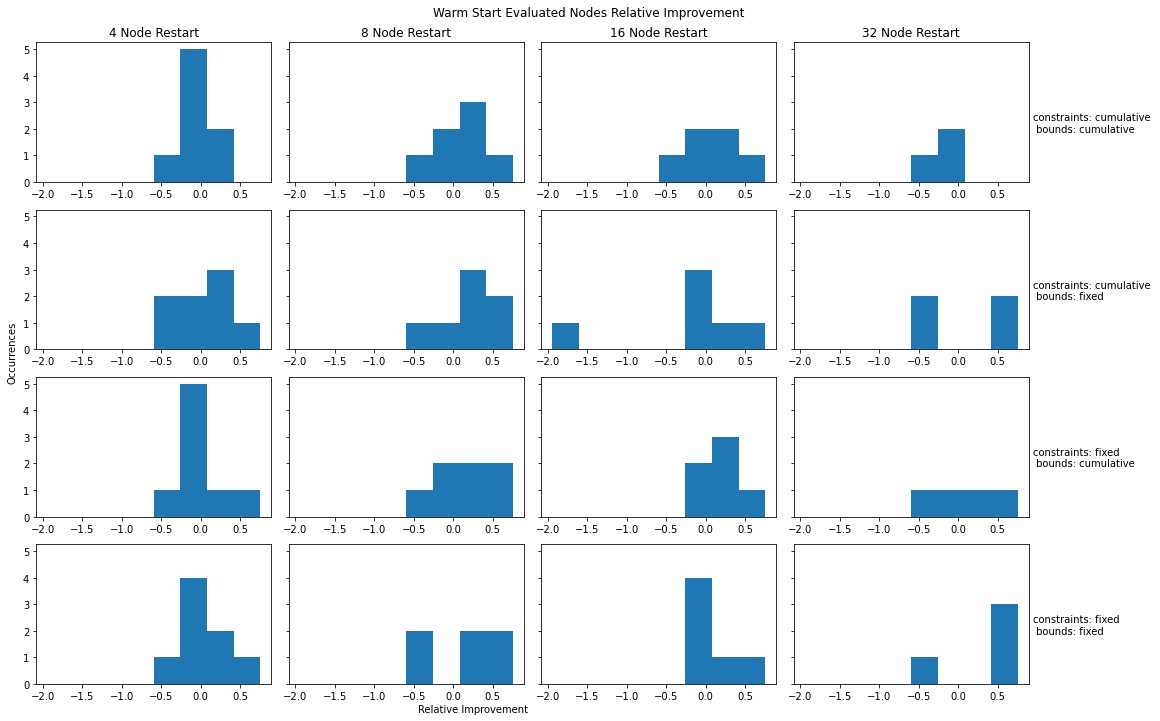

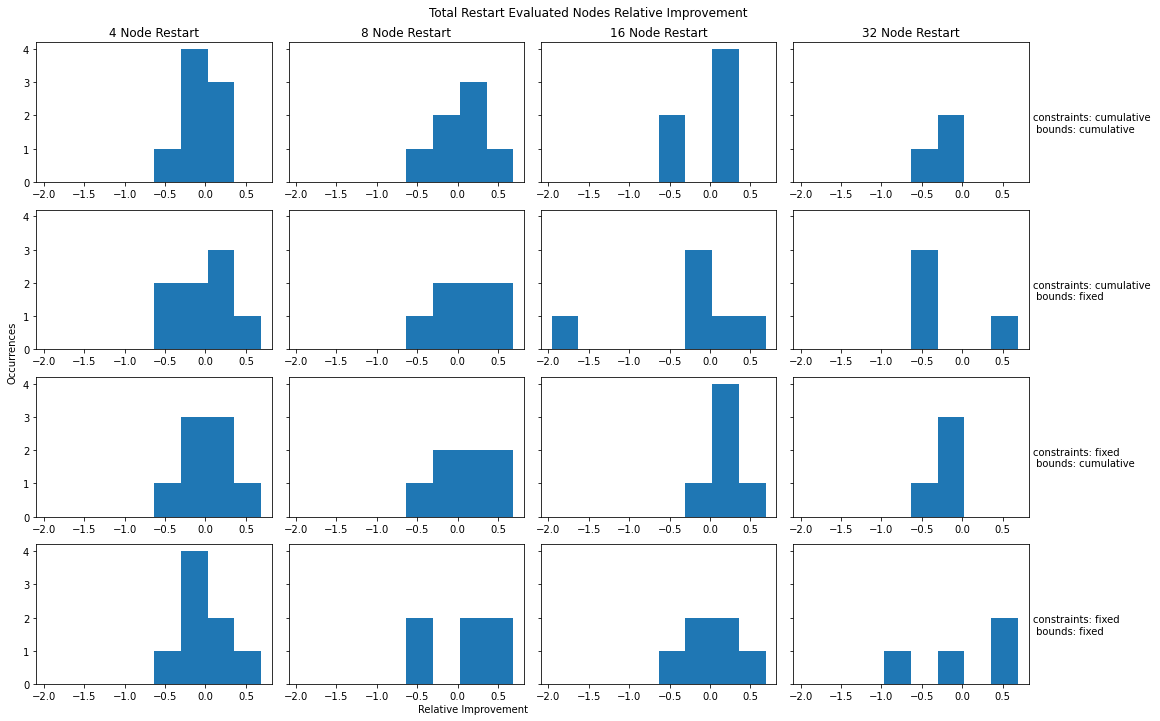

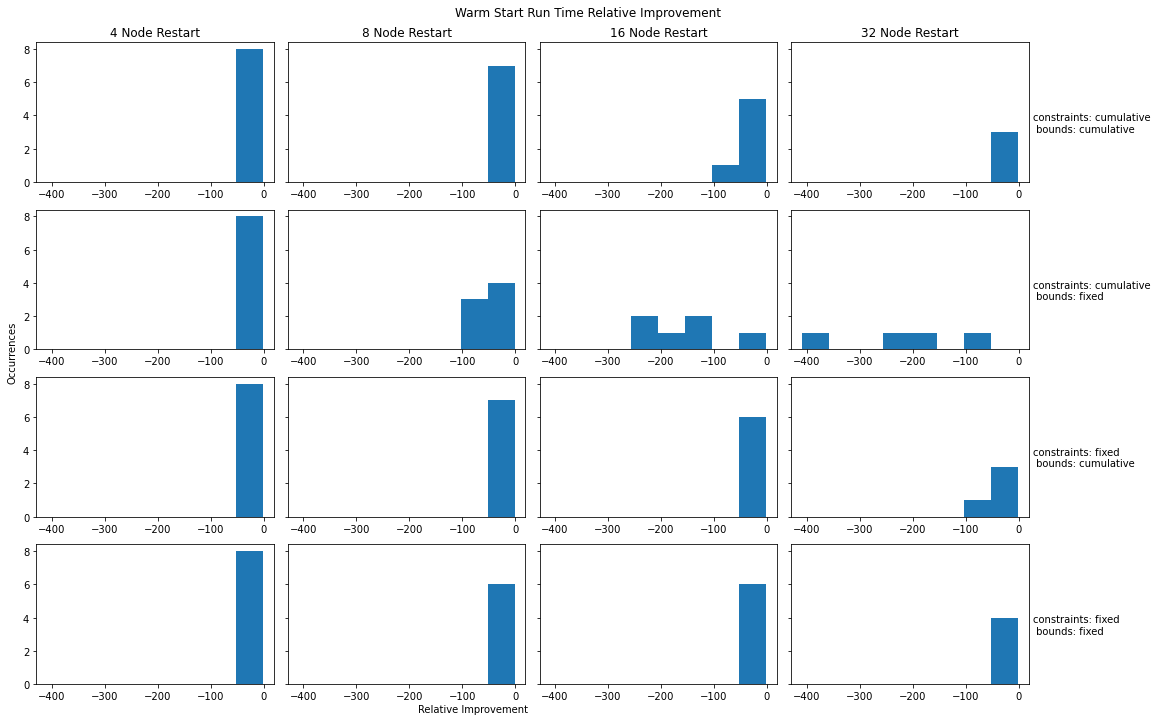

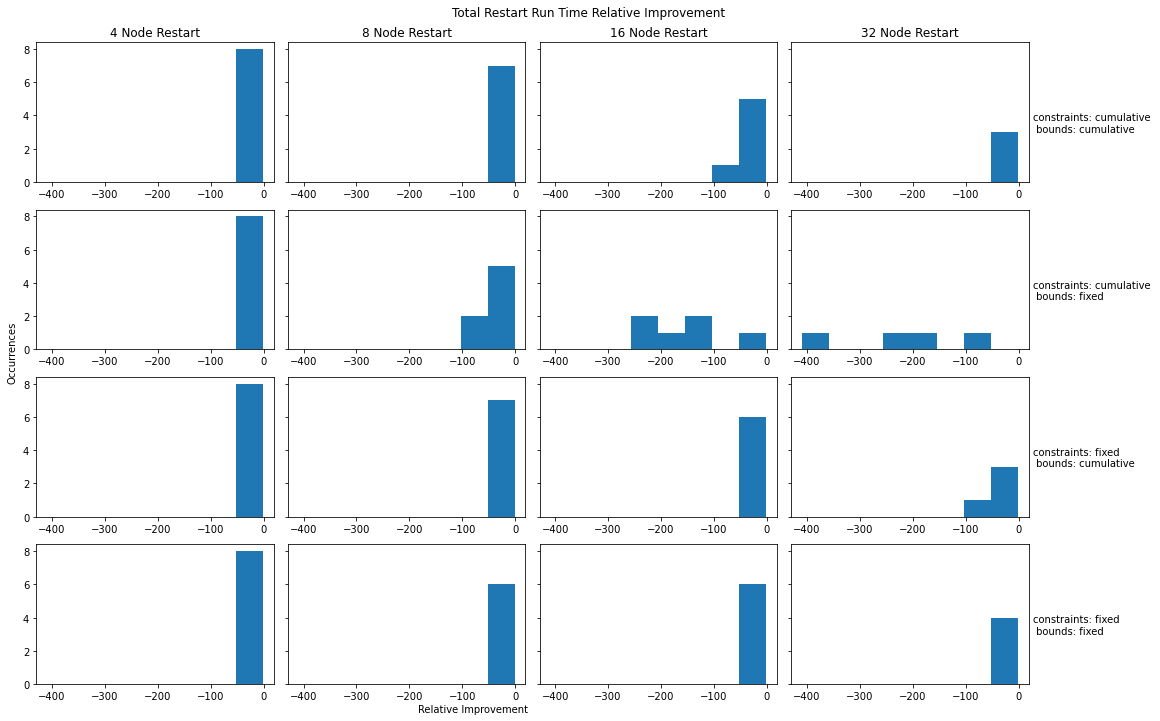

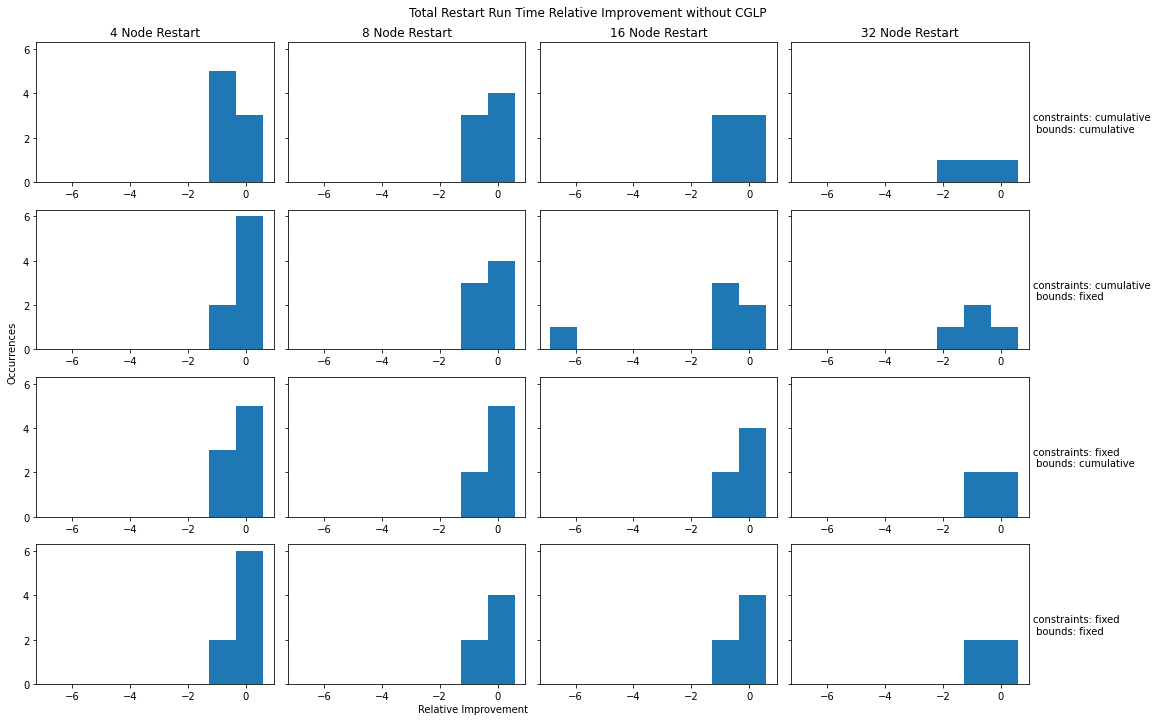

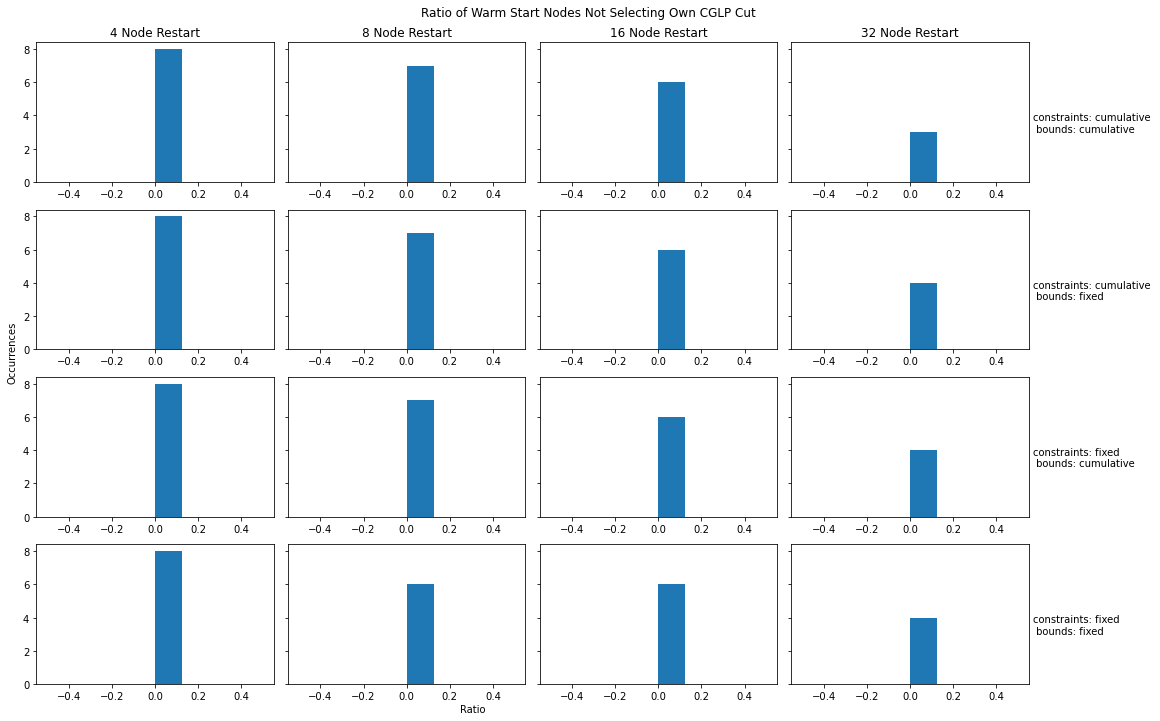

In [22]:
for metric, name in title.items():
    # make a new side by side plot for each metric
    fig, ax = plt.subplots(nrows=len(cglp_parameters), ncols=len(cut_offs), sharey=True,
                          figsize=(16, 10))
    low, high =  df[metric].min(), df[metric].max()
    for j, cut_off in enumerate(cut_offs):
        for i, p in enumerate(cglp_parameters):
            # make plot
            samples = df.loc[(df['cut off'] == cut_off) &
                             (df['cglp_constraints'] == p['cglp_constraints']) &
                             (df['cglp_bounds'] == p['cglp_bounds'])][metric]
            ax[i, j].hist(samples, bins=tests, range=(low, high))
            if j == 3:
                ax[i, j].set_ylabel(f'constraints: {p["cglp_constraints"]} \n bounds: {p["cglp_bounds"]} \n',
                                   ha='left', rotation='horizontal', va='center')
                ax[i, j].yaxis.set_label_position("right")

            # make it pretty
            if i == 0:
                ax[i, j].set_title(f"{cut_off} Node Restart")
    fig.suptitle(name)
    fig.tight_layout()
    if metric != 'warm null cglp ratio':
        fig.text(0.4, 0, 'Relative Improvement', ha='center')
    else:
        fig.text(0.4, 0, 'Ratio', ha='center')
    fig.text(0, 0.46, 'Occurrences', ha='center', rotation='vertical')
    fig.show()
#     fig.savefig(f'{name}.png')

/var/folders/qh/8w1ddh_n45l3750bgmcgmd4r0000gn/T/ipykernel_3031/4039499262.py:36: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


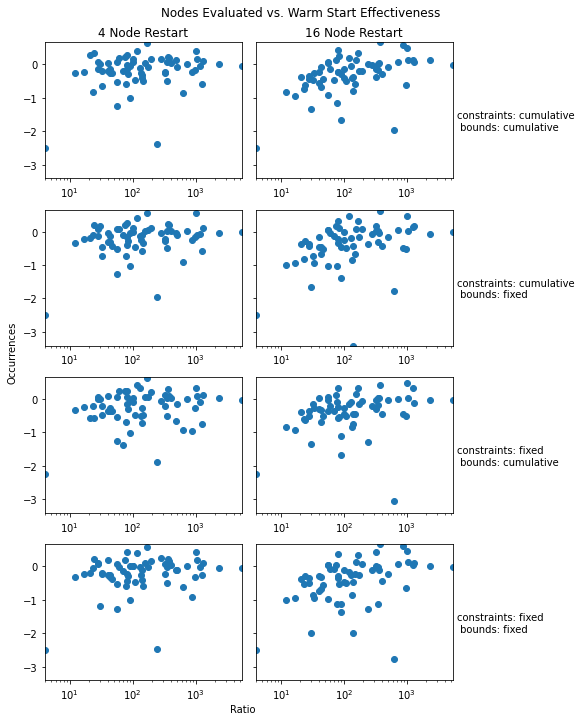

In [14]:
name = 'Nodes Evaluated vs. Warm Start Effectiveness'
x_col = 'cold evaluated nodes'
y_col = 'total restart evaluated nodes ratio'

fig, ax = plt.subplots(nrows=len(cglp_parameters), ncols=len(cut_offs), sharey=True,
                      figsize=(8, 10))
x_low = df['cold evaluated nodes'].min()
x_high = df['cold evaluated nodes'].max()
y_low = df['total restart evaluated nodes ratio'].min()
y_high = df['total restart evaluated nodes ratio'].max()

for j, cut_off in enumerate(cut_offs):
    for i, p in enumerate(cglp_parameters):
        # make plot
        samples = df.loc[(df['cut off'] == cut_off) &
                         (df['cglp_constraints'] == p['cglp_constraints']) &
                         (df['cglp_bounds'] == p['cglp_bounds'])][[x_col, y_col]]
        ax[i, j].scatter(samples[x_col], samples[y_col])
        ax[i, j].axis(xmin=x_low, xmax=x_high, ymin=y_low, ymax=y_high)
        ax[i, j].set_xscale('log')
        if j == 1:
            ax[i, j].set_ylabel(f'constraints: {p["cglp_constraints"]} \n bounds: {p["cglp_bounds"]} \n',
                               ha='left', rotation='horizontal', va='center')
            ax[i, j].yaxis.set_label_position("right")

        # make it pretty
        if i == 0:
            ax[i, j].set_title(f"{cut_off} Node Restart")
fig.suptitle(name)
fig.tight_layout()
if metric != 'warm null cglp ratio':
    fig.text(0.4, 0, 'Relative Improvement', ha='center')
else:
    fig.text(0.4, 0, 'Ratio', ha='center')
fig.text(0, 0.46, 'Occurrences', ha='center', rotation='vertical')
fig.show()
fig.savefig(f'{name}.png')

## Scratch

In [ ]:
for metric, name in title.items():
    # make a new side by side plot for each metric
    fig, ax = plt.subplots(nrows=1, ncols=len(cut_offs), sharey=True)
    low, high =  df[metric].min(), df[metric].max()
    for i, cut_off in enumerate(cut_offs):
        # make plot
        samples = df.loc[df['cut off'] == cut_off][metric]
        ax[i].hist(samples, bins=tests, range=(low, high))

        # make it pretty
        ax[i].set_title(f"{cut_off} Node Restart")
        if i == 0:
            ax[i].set_ylabel('Occurrences')
    fig.suptitle(name)
    fig.text(0.5, 0.04, 'Relative Improvement', ha='center')
    fig.show()